# ELG7186 - Fall 2022 - Assignment 3
## Due: <strong>Wednesday Nov. 23<sup>st</sup> 2022 -- 11:59pm</strong>

In this assignment, you will apply your knowledge of CNNs we want to estimate the growth stage of weeds using the number of leaves of the plant. The more leaves, the more the weed has grown.

The purpose of this assignment is to gain experience building and training neural networks. You will gain:
- More experience training CNNs
- Experience with problem reformulation
- Experience with techniques for improving results (Regularization, Data Augmentation)

You must use Keras with the Tensorflow backend, i.e., the package tensorflow.keras. For this assignment, you may use other tensorflow packages and scikit-learn, scikit-image or pandas but not other deep learning frameworks, e.g., pytorch, mxnet etc.

### Submission Details
Submit your Jupyter notebook .ipynb file using Brightspace. Do not include any other files or images as they will not be reviewed.
<p>
<strong>Make certain that you run all the cells in the notebook you submit</strong> or you will loose marks.
</p>
<ul>
<li>You can submit multiple times, but only the most recent submission will be saved</li>
<li>Do not wait until the last minute to submit in case you have an unexpected issue</li>
<li>Review the late policy in the syllabus</li>
<li><strong>You must submit your own work</strong> and abide by the University of Ottawa policy on plagiarism and fraud</li>
</ul>


### DO NOT submit any images from the dataset

## Part 0. Data Preparation

The data for this assignment are plant images at different resolutions captured with a variety of cameras. There are images showing plants with approximatelty 1,2,3,4 and 6 leafs. The images are part of a Leaf counting dataset by Teimouri et al. [1] which can be downloaded from the Aarhus University, Denmark:

<a href="https://vision.eng.au.dk/leaf-counting-dataset/">Leaf counting dataset</a> (Required files are posted on Brightspace)

However, you must work with the subset of images posted on BrightSpace as training.zip and testing.zip. There are 200 images for each of the 5 classes. As Figure 1 shows, there is a great variety of plants and image conditions. The dataset is split into a training and a testing set where there are 180 images per class for training and validation; and 20 images for testing.




In this section:
<ul>
<li>Download the dataset as described above</li>
<li>Use the splits provided in the Brightspace files</li>
<li>Visualize five images from the dataset.</li>
</ul>


In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Prepare your dataset here
# Prepare your dataset here
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
#from tensorflow.keras import layers, Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
import random

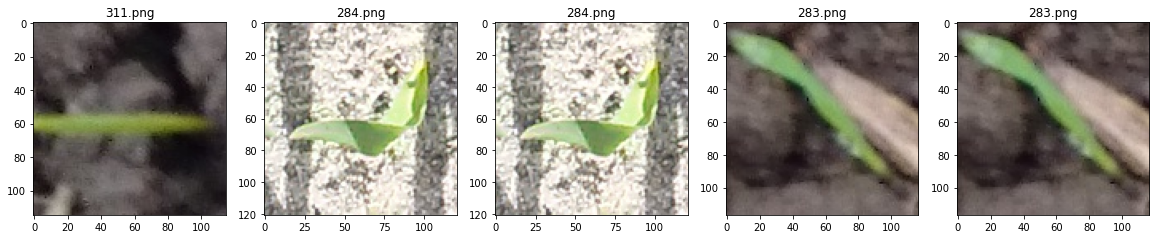

In [4]:
plt.figure(figsize=(20,20))
img_folder=r'F:\Debi\Computer vesion\testing\1'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [5]:
h=64
w=64

In [6]:
#training data
def read_img(path):
    img=[]
    label=[]
    training_folder=path
    for dirict in os.listdir(training_folder):
        for f in os.listdir(os.path.join(training_folder,dirict)):
            img_path=os.path.join(training_folder,dirict,f)
            image=cv2.imread(img_path,cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (h, w),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img.append(np.asarray(image))
            label.append(int(dirict))

    return img,label

In [7]:
training_data=read_img(r'F:\Debi\Computer vesion\training')

In [8]:
testing_data= read_img(r'F:\Debi\Computer vesion\testing')

## Part 1a. Transfer Learning - Classification Network (3 Marks)
For this assignment, you are asked to use the Keras implementation of VGG-16 as a starting point. 

Using the first 2 blocks of VGG-16 add extra Keras layers to create your own version of a CNN network for the classification of the images according to the number of leaves in the plant images. Note that there will be 5 classes. The last layer from VGG-16 will be block2 pool and you are allowed to add no more than five fully connected or convolutional layers to the network including the final output layer. 

- You can use as many pooling, flattening, 1 × 1 convolution layers, etc. as you wish but do not use any regularization.
- Train this simple network on the training set while monitoring convergence on the validation set.
- As input to the model use images of size no larger than 128×128.

Note, it is highly recommended to use even smaller input images to try things out. You are not expected to fine-tune the initial VGG layers.

When your classifier is working:
- Plot a loss curve for training and validation data
- Plot an accuracy curve for training and validation data
- Provide confusion matrix of your network on the training including validation and testing data sets.


In [9]:
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout,Conv2D,MaxPooling2D

In [10]:
# Write your code here
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(training_data[0],training_data[1], train_size=0.8)
X_test=testing_data[0]
y_test=testing_data[1]

In [11]:
X_train=np.asarray(X_train)

In [12]:
X_valid=np.asarray(X_valid)

In [13]:
X_test=np.asarray(X_test)

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_c=to_categorical(le.fit_transform(y_train))
len(y_train_c)

720

In [16]:
y_test_c=to_categorical(le.fit_transform(y_test))
len(y_test_c)

100

In [17]:
y_valid_c=to_categorical(le.fit_transform(y_valid))
y_valid_c.shape

(180, 5)

In [27]:
vgg16_model=tf.keras.applications.vgg16.VGG16(weights="imagenet", include_top=False, input_shape=(64,64,3))
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [28]:
layer_dict = dict([(layer.name, layer) for layer in vgg16_model.layers])
outp = layer_dict['block2_pool'].output
vgg161_model = tf.keras.Model(inputs=vgg16_model.input, outputs=outp)

In [29]:

for b in vgg161_model.layers:
    b.trainable = False
#VGG_reg_model.layers[-1].output

In [30]:
vgg161_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [36]:
pretrained=vgg161_model.layers[-1].output
pretrained=Conv2D(256, kernel_size=(3,3),padding="same",activation="relu")(pretrained)
pretrained=MaxPooling2D(pool_size=2)(pretrained)
#pretrained=Conv2D(16, kernel_size=(1,1),padding="same",activation="relu")(pretrained)
#pretrained=MaxPooling2D(pool_size=2)(pretrained)
pretrained=Flatten()(pretrained)
# add layers 
#pretrained = Dense(1024, activation='relu')(pretrained)
pretrained = Dense(512, activation='relu')(pretrained)
pretrained = Dense(256, activation='relu')(pretrained)
pretrained = Dense(128, activation='relu')(pretrained)
pretrained = Dense(5, activation='softmax')(pretrained)

In [38]:
# build new model 
pretrained_model = Model()
pretrained_model = Model(inputs=vgg161_model.input, outputs=pretrained)
pretrained_model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [39]:
from livelossplot import PlotLossesKeras

In [40]:
pretrained_model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

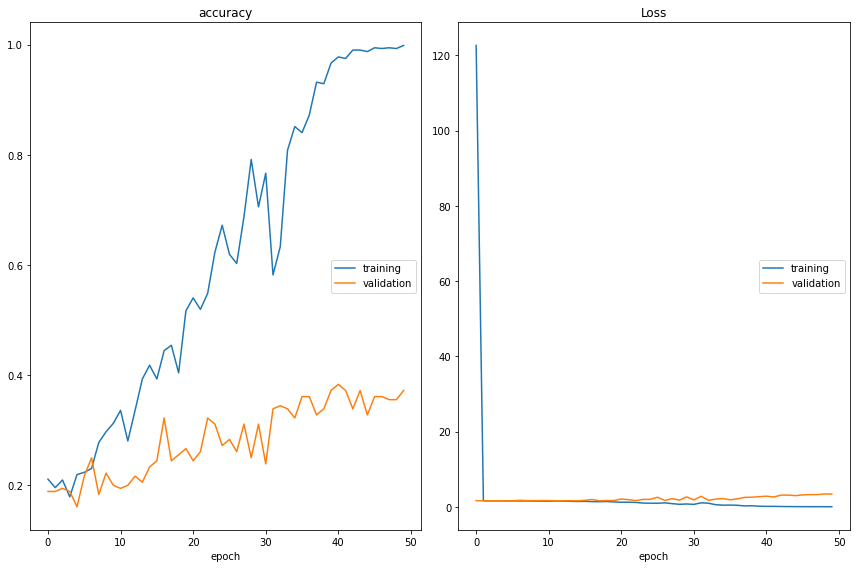

accuracy
	training         	 (min:    0.179, max:    0.999, cur:    0.999)
	validation       	 (min:    0.161, max:    0.383, cur:    0.372)
Loss
	training         	 (min:    0.039, max:  122.618, cur:    0.039)
	validation       	 (min:    1.617, max:    3.434, cur:    3.390)
8/8 [==============================] - 10s 1s/step - loss: 0.0390 - accuracy: 0.9986 - val_loss: 3.3903 - val_accuracy: 0.3722


In [41]:
pretrained_fit=pretrained_model.fit(X_train, y_train_c ,batch_size=100, epochs=50, validation_data=(X_valid , y_valid_c),callbacks=[PlotLossesKeras()],
            verbose=1)

In [42]:
def get_accuracies(y_actual, y_predict):
  from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
#   print('\nClassification Report:\n')
#   print(classification_report(y_actual, y_predict))
  print('\nConfusion Matrix:\n')
  cm = confusion_matrix(y_actual, y_predict)
  print(cm)
  print('\nAccuracy Score:\n')
  print(accuracy_score(y_actual, y_predict))
  print('\Confusion Matrix Display:\n')
  print(ConfusionMatrixDisplay(cm).plot())

In [43]:
y_prop=pretrained_model.predict(X_test)

4/4 [==============================] - 1s 193ms/step


In [44]:
y_prop_pred=y_prop.argmax(axis=-1)



Confusion Matrix:

[[ 9  1  4  1  5]
 [ 6  8  4  2  0]
 [ 2  4  6  2  6]
 [ 1  0  3  5 11]
 [ 2  0  6  4  8]]

Accuracy Score:

0.36
\Confusion Matrix Display:



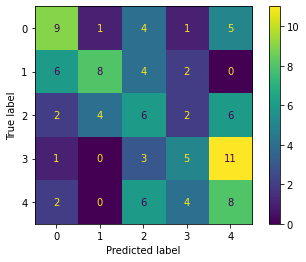

In [45]:
get_accuracies(le.fit_transform(y_test),y_prop_pred)

23/23 [==============================] - 7s 287ms/step

Confusion Matrix:

[[144   0   0   0   0]
 [  0 138   0   0   0]
 [  0   0 148   0   0]
 [  0   0   0 143   0]
 [  1   0   0   0 146]]

Accuracy Score:

0.9986111111111111
\Confusion Matrix Display:



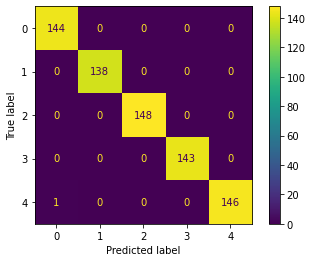

In [46]:
y_prop=pretrained_model.predict(X_train)
y_prop_pred1=y_prop.argmax(axis=-1)
get_accuracies(le.fit_transform(y_train),y_prop_pred1)

6/6 [==============================] - 1s 229ms/step

Confusion Matrix:

[[25  4  0  2  5]
 [ 9 11  6  4 12]
 [ 3  7  2  5 15]
 [ 7  6  7 10  7]
 [ 0  4  8  2 19]]

Accuracy Score:

0.37222222222222223
\Confusion Matrix Display:



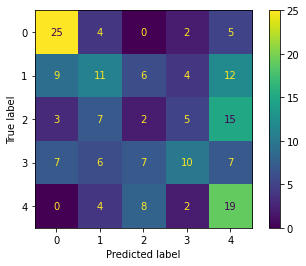

In [47]:
y_prop=pretrained_model.predict(X_valid)
y_prop_pred2=y_prop.argmax(axis=-1)
get_accuracies(le.fit_transform(y_valid),y_prop_pred2)

## Part 1b. Transfer Learning - Regression Reformulation (3 Marks)

### Step 1 (2)
Repeat the steps of Part 1a. but reformulate as a regression problem, i.e., your network needs to output a single float value ranging between 0 to 6 corresponding to the number of leaves. Again, you are not expected to fine-tune the initial VGG layers.

- Plot a loss curve for training and validation data
- Plot an accuracy curve for training and validation data
- Provide confusion matrix of your network on the training including validation and testing data sets.

### Step 2 (1)
The size of the training data is quite small. Discuss based on your learning curves if overfitting is occurring with the models from Parts 1a and 1b.

In [48]:
from livelossplot import PlotLossesKeras

In [49]:
from tensorflow.keras.losses import MeanAbsoluteError, MeanAbsolutePercentageError

In [80]:
vgg16_reg_model=tf.keras.applications.vgg16.VGG16(weights="imagenet", include_top=False, input_shape=(64,64,3))
vgg16_reg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [81]:
layer_dict = dict([(layer.name, layer) for layer in vgg16_reg_model.layers])
outp = layer_dict['block2_pool'].output
vgg162_model = tf.keras.Model(inputs=vgg16_reg_model.input, outputs=outp)

In [82]:
for b in vgg162_model.layers:
    b.trainable = False
#VGG_reg_model.layers[-1].output

In [83]:
vgg162_model.summary()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0  

In [84]:
pretrained2=vgg162_model.layers[-1].output
pretrained2=Conv2D(256, kernel_size=(3,3),padding="same",activation="relu")(pretrained2)
pretrained2=MaxPooling2D(pool_size=2)(pretrained2)
#pretrained=Conv2D(16, kernel_size=(1,1),padding="same",activation="relu")(pretrained)
#pretrained=MaxPooling2D(pool_size=2)(pretrained)
pretrained2=Flatten()(pretrained2)
# add layers 
#pretrained = Dense(1024, activation='relu')(pretrained)
pretrained2 = Dense(512, activation='relu')(pretrained2)
pretrained2 = Dense(256, activation='relu')(pretrained2)
pretrained2 = Dense(128, activation='relu')(pretrained2)
pretrained2 = Dense(1, activation='linear')(pretrained2)

In [85]:
# build new model 
pretrained_model2 = Model()
pretrained_model2 = Model(inputs=vgg162_model.input, outputs=pretrained2)
pretrained_model2.summary()

Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0  

In [86]:
pretrained_model2.compile(loss="mean_absolute_error", metrics=['mse'],optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001))


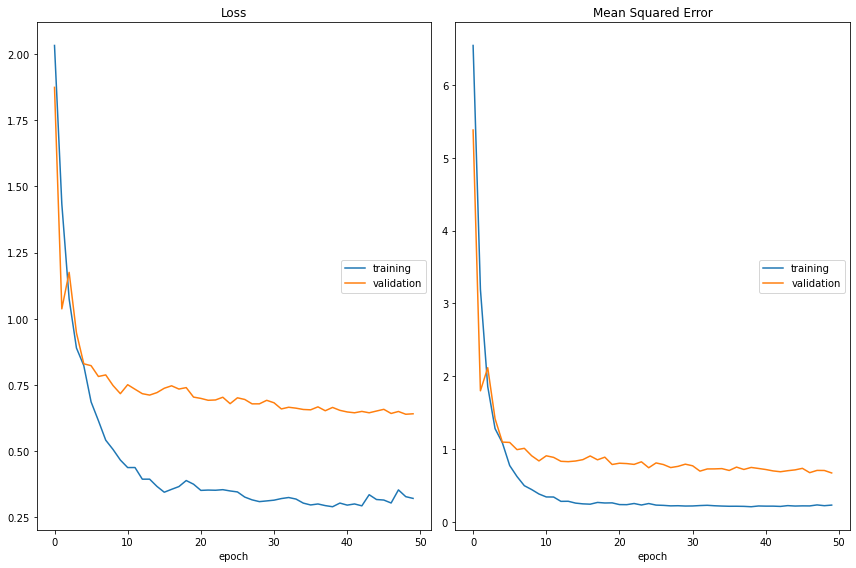

Loss
	training         	 (min:    0.289, max:    2.033, cur:    0.321)
	validation       	 (min:    0.639, max:    1.875, cur:    0.641)
Mean Squared Error
	training         	 (min:    0.207, max:    6.545, cur:    0.229)
	validation       	 (min:    0.671, max:    5.383, cur:    0.671)
8/8 [==============================] - 10s 1s/step - loss: 0.3209 - mse: 0.2293 - val_loss: 0.6408 - val_mse: 0.6710


In [87]:
pretrained_fit2=pretrained_model2.fit(X_train, y_train_c ,batch_size=100, epochs=50, validation_data=(X_valid , y_valid_c),callbacks=[PlotLossesKeras()],
            verbose=1)

In [88]:
y_prop2=pretrained_model2.predict(X_test)

4/4 [==============================] - 1s 233ms/step


In [89]:
def get_prediction(pred):
  x =pred[:,0].round()
  pred_val=[]
  for i in x:
    if abs(i) <= 0:
      pred_val.append(0)
    elif abs(i) >= 4 :
      pred_val.append(4)
    else:
      pred_val.append(int(abs(i)))
  return pred_val

In [90]:
pred = pretrained_model2.predict(X_test)
prediction = get_prediction(pred)


4/4 [==============================] - 1s 221ms/step



Confusion Matrix:

[[11  7  2  0  0]
 [11  8  1  0  0]
 [14  6  0  0  0]
 [11  9  0  0  0]
 [ 5 14  1  0  0]]

Accuracy Score:

0.19
\Confusion Matrix Display:



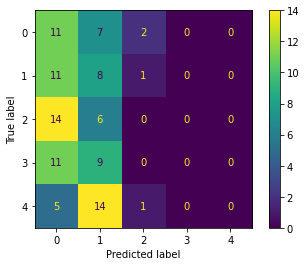

In [91]:
get_accuracies(le.fit_transform(y_test),prediction)

23/23 [==============================] - 7s 283ms/step

Confusion Matrix:

[[127  17   0   0   0]
 [133   5   0   0   0]
 [139   9   0   0   0]
 [134   9   0   0   0]
 [139   8   0   0   0]]

Accuracy Score:

0.18333333333333332
\Confusion Matrix Display:



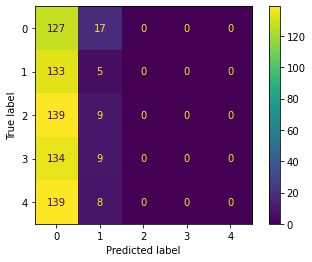

In [92]:
pred_train = pretrained_model2.predict(X_train)
prediction_train = get_prediction(pred_train)
get_accuracies(le.fit_transform(y_train),prediction_train)

6/6 [==============================] - 2s 266ms/step

Confusion Matrix:

[[15 17  4  0  0]
 [27 13  2  0  0]
 [20 11  1  0  0]
 [23 14  0  0  0]
 [19 13  0  1  0]]

Accuracy Score:

0.16111111111111112
\Confusion Matrix Display:



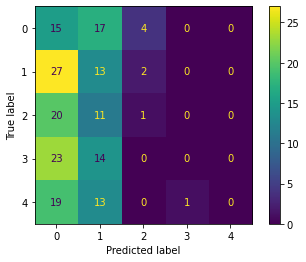

In [93]:
pred_valid = pretrained_model2.predict(X_valid)
prediction_valid = get_prediction(pred_valid)
get_accuracies(le.fit_transform(y_valid),prediction_valid)

Write your discussion here.
Part 1a: Due to the small number of trainig dataset the model is face an overfitting problem which occurs clearly in the accuracy graph since the accuracy of the training data is 98% while in testing accuracy is 36.5% this an indicator of overfitting to overcome this problem a reguralization term may be used

Part 1b: for the transfered regression model I used one neuron in the output layer and linear activation function and mean square error as loss function in this part the overfitting problem occure clearly as it occurs in the loss graph, the training loss continues to decrease with experience and validation loss decreases to a point and begins increasing again.
training accuracy :18%
validation accuracy: 16%

## Part 2. Improve your Model (4 Marks)

Regularization and data augmentation are common strategies to deal with small datasets.

### Step 1 (1.5)
Incorporate Batch Normalization and Dropout into your design the superior network trained in Part 1. You are not expected to fine-tune the initial VGG layers. Again you will provide the following:
- A loss curve for training and validation data
- An accuracy curve for training and validation data
- A confusion matrix of your network on the training including validation and testing data sets.
 

### Step 2 (1.5)
Train the same model from Step 1, now using data augmentation. Again, please provide the same output metrics as in Step 1.

### Step 3 (1)
Discuss based on your learning curves and final metrics in Step 2, how large a improvement can be observed from regularization and data augmentation.

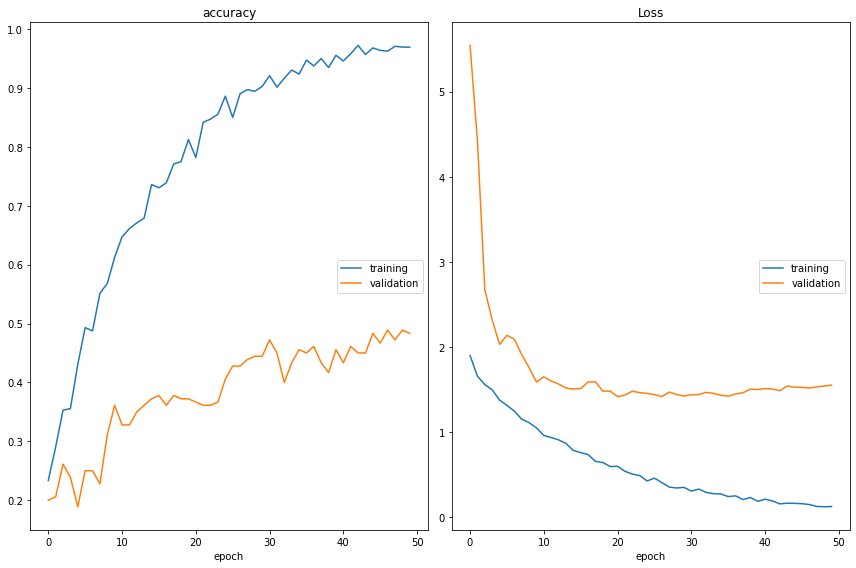

accuracy
	training         	 (min:    0.233, max:    0.972, cur:    0.969)
	validation       	 (min:    0.189, max:    0.489, cur:    0.483)
Loss
	training         	 (min:    0.122, max:    1.898, cur:    0.124)
	validation       	 (min:    1.416, max:    5.542, cur:    1.552)
8/8 [==============================] - 11s 1s/step - loss: 0.1241 - accuracy: 0.9694 - val_loss: 1.5518 - val_accuracy: 0.4833


In [94]:
# Write your code here
vgg16_Imp_model=tf.keras.applications.vgg16.VGG16(weights="imagenet", include_top=False, input_shape=(64,64,3))
vgg16_Imp_model.summary()

layer_dict = dict([(layer.name, layer) for layer in vgg16_Imp_model.layers])
outp = layer_dict['block2_pool'].output
vgg16_im_model = tf.keras.Model(inputs=vgg16_Imp_model.input, outputs=outp)


for b in vgg16_im_model.layers:
    b.trainable = False
#VGG_reg_model.layers[-1].output

vgg16_im_model.summary()

pretrained3=vgg16_im_model.layers[-1].output

pretrained3=Conv2D(256, kernel_size=(3,3),padding="same",activation="relu")(pretrained3)
pretrained3=MaxPooling2D(pool_size=2)(pretrained3)
pretrained3 = BatchNormalization()(pretrained3)
pretrained3= Dropout(0.5)(pretrained3)
#pretrained=Conv2D(16, kernel_size=(1,1),padding="same",activation="relu")(pretrained)
#pretrained=MaxPooling2D(pool_size=2)(pretrained)
pretrained3=Flatten()(pretrained3)
# add layers 
#pretrained = Dense(1024, activation='relu')(pretrained)
pretrained3 = Dense(512, activation='relu')(pretrained3)
pretrained3 = BatchNormalization()(pretrained3)
pretrained3= Dropout(0.5)(pretrained3)
pretrained3 = Dense(256, activation='relu')(pretrained3)
# pretrained3 = BatchNormalization()(pretrained3)
# pretrained3= Dropout(0.3)(pretrained3)
pretrained3 = Dense(128, activation='relu')(pretrained3)
pretrained3 = Dense(5, activation='softmax')(pretrained3)

# build new model 
pretrained3_model = Model()
pretrained3_model = Model(inputs=vgg16_im_model.input, outputs=pretrained3)
pretrained3_model.summary()

from livelossplot import PlotLossesKeras

pretrained3_model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

pretrained_fitt=pretrained3_model.fit(X_train, y_train_c ,batch_size=100, epochs=50, validation_data=(X_valid , y_valid_c),callbacks=[PlotLossesKeras()],
            verbose=1)



4/4 [==============================] - 1s 219ms/step

Confusion Matrix:

[[10  5  2  1  2]
 [ 5 10  5  0  0]
 [ 2  7  4  5  2]
 [ 2  2  2  8  6]
 [ 0  1  2  3 14]]

Accuracy Score:

0.46
\Confusion Matrix Display:



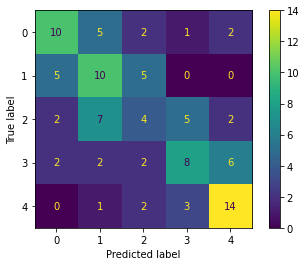

In [95]:
y_prop_imp=pretrained3_model.predict(X_test)
y_propp_pred=y_prop_imp.argmax(axis=-1)
get_accuracies(le.fit_transform(y_test),y_propp_pred)



23/23 [==============================] - 7s 284ms/step

Confusion Matrix:

[[144   0   0   0   0]
 [  0 138   0   0   0]
 [  0   0 148   0   0]
 [  0   0   0 143   0]
 [  0   0   0   0 147]]

Accuracy Score:

1.0
\Confusion Matrix Display:



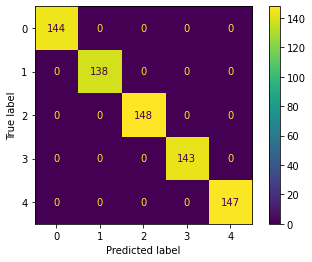

In [96]:
y_prop_train=pretrained3_model.predict(X_train)
y_propb_pred1=y_prop_train.argmax(axis=-1)
get_accuracies(le.fit_transform(y_train),y_propb_pred1)



6/6 [==============================] - 2s 274ms/step

Confusion Matrix:

[[24  9  2  0  1]
 [ 7 17  7  5  6]
 [ 3 10 11  1  7]
 [ 1  8  5 16  7]
 [ 1  5  1  7 19]]

Accuracy Score:

0.48333333333333334
\Confusion Matrix Display:



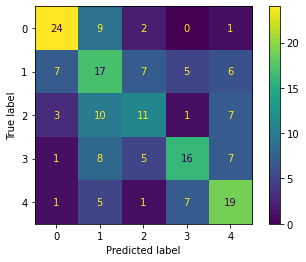

In [97]:
y_prop_valid=pretrained3_model.predict(X_valid)
y_prop_pred2=y_prop_valid.argmax(axis=-1)
get_accuracies(le.fit_transform(y_valid),y_prop_pred2)

In [71]:
vgg16_aug_model=tf.keras.applications.vgg16.VGG16(weights="imagenet", include_top=False, input_shape=(64,64,3))
vgg16_aug_model.summary()

layer_dict = dict([(layer.name, layer) for layer in vgg16_aug_model.layers])
outp = layer_dict['block2_pool'].output
vgg16_ag_model = tf.keras.Model(inputs=vgg16_aug_model.input, outputs=outp)


for b in vgg16_ag_model.layers:
    b.trainable = False
#VGG_reg_model.layers[-1].output

vgg16_ag_model.summary()

pretrained4=vgg16_ag_model.layers[-1].output
pretrained4=Conv2D(256, kernel_size=(3,3),padding="same",activation="relu")(pretrained4)
pretrained4=MaxPooling2D(pool_size=2)(pretrained4)
pretrained4 = BatchNormalization()(pretrained4)
pretrained4= Dropout(0.5)(pretrained4)
#pretrained=Conv2D(16, kernel_size=(1,1),padding="same",activation="relu")(pretrained)
#pretrained=MaxPooling2D(pool_size=2)(pretrained)
pretrained4=Flatten()(pretrained4)
# add layers 
#pretrained = Dense(1024, activation='relu')(pretrained)
pretrained4 = Dense(512, activation='relu')(pretrained4)
pretrained4 = BatchNormalization()(pretrained4)
pretrained4= Dropout(0.5)(pretrained4)
pretrained4 = Dense(256, activation='relu')(pretrained4)
# pretrained3 = BatchNormalization()(pretrained3)
# pretrained3= Dropout(0.3)(pretrained3)
pretrained4 = Dense(128, activation='relu')(pretrained4)
pretrained4 = Dense(5, activation='softmax')(pretrained4)

# build new model 
pretrained4_model = Model()
pretrained4_model = Model(inputs=vgg16_ag_model.input, outputs=pretrained4)
pretrained4_model.summary()




Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [72]:
from keras.preprocessing.image import ImageDataGenerator

In [73]:
train_generator =ImageDataGenerator(
    featurewise_center=True,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    featurewise_std_normalization=True,
    rotation_range=20, 
    
    )
train_generator.fit(X_train)
generator = train_generator.flow(
    X_train,
    y_train_c,
    batch_size=100,
)

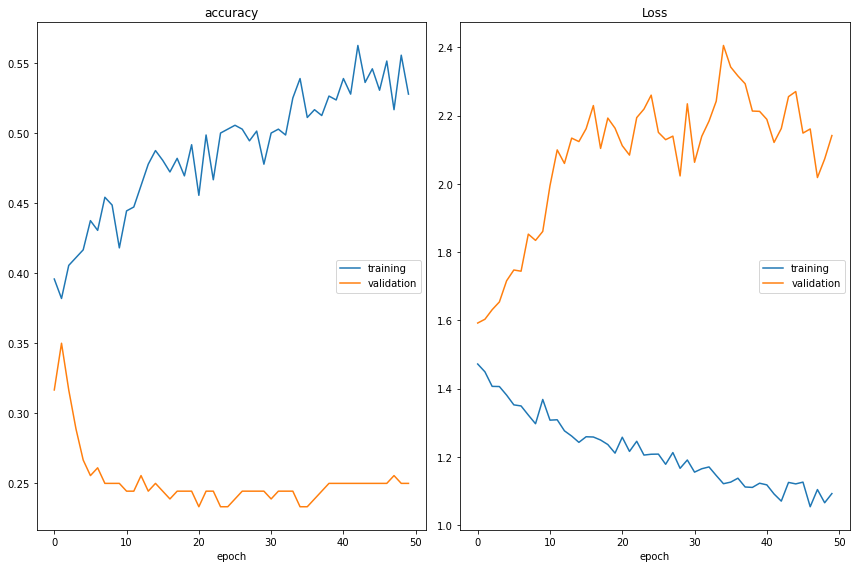

accuracy
	training         	 (min:    0.382, max:    0.562, cur:    0.528)
	validation       	 (min:    0.233, max:    0.350, cur:    0.250)
Loss
	training         	 (min:    1.054, max:    1.472, cur:    1.093)
	validation       	 (min:    1.592, max:    2.405, cur:    2.141)
8/8 [==============================] - 11s 1s/step - loss: 1.0927 - accuracy: 0.5278 - val_loss: 2.1415 - val_accuracy: 0.2500


In [78]:
from livelossplot import PlotLossesKeras

pretrained4_model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

pretrained_fittt=pretrained4_model.fit(generator, epochs=50, validation_data=(X_valid , y_valid_c),callbacks=[PlotLossesKeras()],
            verbose=1)


4/4 [==============================] - 1s 187ms/step

Confusion Matrix:

[[ 0 15  0  1  4]
 [ 0 12  3  2  3]
 [ 0 12  2  1  5]
 [ 0  6  1  2 11]
 [ 0  8  1  1 10]]

Accuracy Score:

0.26
\Confusion Matrix Display:



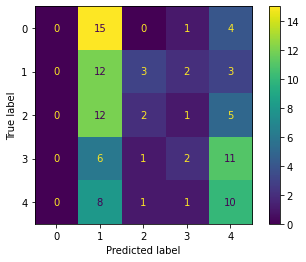

In [75]:
y_prop_ag=pretrained4_model.predict(X_test)
y_aug_pred=y_prop_ag.argmax(axis=-1)
get_accuracies(le.fit_transform(y_test),y_aug_pred)



23/23 [==============================] - 6s 280ms/step

Confusion Matrix:

[[  2  75  30   9  28]
 [  0 101  18   8  11]
 [  1  72  20  15  40]
 [  0  55  11  33  44]
 [  0  51   8  19  69]]

Accuracy Score:

0.3125
\Confusion Matrix Display:



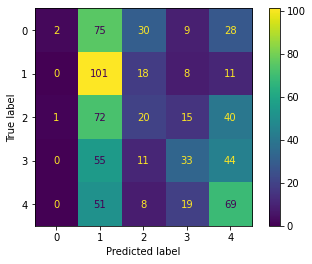

In [76]:
y_aug_train=pretrained4_model.predict(X_train)
y_aug_pred1=y_aug_train.argmax(axis=-1)
get_accuracies(le.fit_transform(y_train),y_aug_pred1)

6/6 [==============================] - 2s 284ms/step

Confusion Matrix:

[[ 2 20  4  1  9]
 [ 0 30  5  2  5]
 [ 0 16  5  3  8]
 [ 0 18  4  4 11]
 [ 0 11  1  6 15]]

Accuracy Score:

0.3111111111111111
\Confusion Matrix Display:



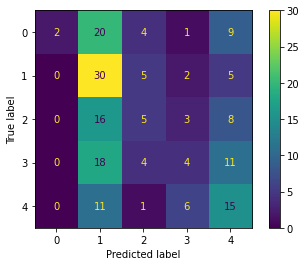

In [77]:
y_aug_valid=pretrained4_model.predict(X_valid)
y_aug_pred2=y_aug_valid.argmax(axis=-1)
get_accuracies(le.fit_transform(y_valid),y_aug_pred2)

Write your discussion here.
step 1: After adding droupout and batch normalization layers to the model it shows that the overfitting problem isn't solved yet as the accuracy of the trainging dataset was 100% while the testing accuracy 41% may the model structure should be changed or by increasing the dataset it will overcome this problem

setp2: various data augmentation techniques is used to increase training dataset and by useing data augmntation it appears that the overfitting problem dosen't occure since the accuracy of the training dataset is 31% and the accuracy of testing dataset is 26% however the model can't classify the images propably so it is an underfitting problem 

## References
[1] N. Teimouri, M. Dyrmann, P. R. Nielsen, S. K. Mathiassen, G. J. Somerville, and R. N. Jørgensen, “Weed growth stage estimator using deep convolutional neural networks,” Sensors, vol. 18, no. 5, 2018.